# Juliaで信号処理の練習
## 1極のデジタルフィルタ

これを
![Fig1](./Resource/Fig1.png)
こうして
![Fig2](./Resource/Fig2.png)
こうしたものを実装する
![Fig3](./Resource/Fig3.png)
$$g=\frac{\omega_cT_\mathrm{s}}{2}$$

In [2]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
function filtprocessing(insig, ωc, fs, ftype)
    N = length(insig)
    outsig = copy(insig)
    g = 0.5*ωc/fs
    G = g/(1 + g)
    s = 0
    
    for i in 1:N
        v = G*(insig[i] - s)
        ylp = v + s
        s = v + ylp
        yhp = insig[i] - ylp
        outsig[i] = ftype == :lpf ? ylp : yhp
    end
    
    return outsig
end

filtprocessing (generic function with 1 method)


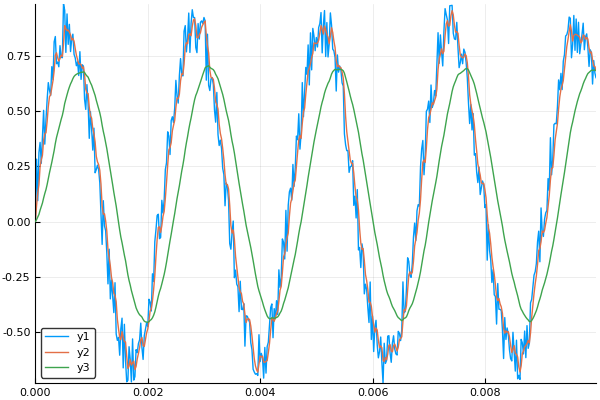

In [4]:
N = 480
fs = 48000.0

rng = MersenneTwister(rand(0:1000))
wn = rand(rng, Float64, N)

t = [i/fs for i in 0:N-1]
f = 440
Ω = 2π*f
sig = 0.75*sin.(Ω*t) + 0.25wn

ωc = 2π*5000
out1 = filtprocessing(sig, ωc, fs, :lpf)

ωc = 2π*500
out2 = filtprocessing(sig, ωc, fs, :lpf)

plot(t, [sig, out1, out2])